<a href="https://colab.research.google.com/github/gihantha-sanjana/CMP7005-Assingment-Work-Repo/blob/main/Beijing%20Multi-Site%20Air%20Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries needed.**

In [564]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# **Mount the Google Drive.**

In [565]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# **Direct to the DataSet Folder Path.**

In [566]:
import os
# Change to the desired directory
os.chdir('/content/drive/My Drive/ColabNotebooks/DatasetCMP7005')

# Verify the current directory
print("Current Directory:", os.getcwd())

Current Directory: /content/drive/My Drive/ColabNotebooks/DatasetCMP7005


# **Display All CSV files in my Google Drive Folder**

In [567]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv']

In [568]:
df_list = [pd.read_csv(file) for file in csv_files]

In [569]:
# Merge the 7 Data Files into One Main CSV file
df_merged = pd.concat(df_list, axis=0, ignore_index=True)

# **Merge the DataSet files into One.**

In [570]:
df_merged

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245443,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
245444,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
245445,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
245446,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


# **Check for null values, data types, and overall structure.**

In [571]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245448 entries, 0 to 245447
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       245448 non-null  int64  
 1   year     245448 non-null  int64  
 2   month    245448 non-null  int64  
 3   day      245448 non-null  int64  
 4   hour     245448 non-null  int64  
 5   PM2.5    240384 non-null  float64
 6   PM10     241758 non-null  float64
 7   SO2      241059 non-null  float64
 8   NO2      239751 non-null  float64
 9   CO       234482 non-null  float64
 10  O3       238425 non-null  float64
 11  TEMP     245212 non-null  float64
 12  PRES     245219 non-null  float64
 13  DEWP     245212 non-null  float64
 14  RAIN     245224 non-null  float64
 15  wd       244690 non-null  object 
 16  WSPM     245265 non-null  float64
 17  station  245448 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 33.7+ MB


# **Rename the Dataset Column Names**

In [572]:
df_merged.rename(columns={'No': 'NO', 'year': 'YEAR', 'month': 'MONTH', 'day':'DAY','hour':'HOUR','DEWP':'DEW_POINT','wd':'WD','WSPM':'WS','station':'STATION'}, inplace=True)

In [573]:
# Check after Rename columns
df_merged.head()

,NO,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEW_POINT,RAIN,WD,WS,STATION
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


# **Converting Object dtypes to category dtype for better Memory-effeciency and Performance.**

In [574]:
df_merged['WD'] = df_merged['WD'].astype('category')
df_merged['STATION'] = df_merged['STATION'].astype('category')

In [575]:
# Check after Converting
df_merged.dtypes

,0
NO,int64
YEAR,int64
MONTH,int64
DAY,int64
HOUR,int64
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64


In [576]:
# Check Null values as Precentage
df_merged.isna().sum()/len(df_merged)*100

,0
NO,0.000000
YEAR,0.000000
MONTH,0.000000
DAY,0.000000
HOUR,0.000000
PM2.5,2.063166
PM10,1.503373
SO2,1.788159
NO2,2.321062
CO,4.467749


# **Combined the Year, Month, Day and Hour Columns as a One Column in Dataset becuase we can do EDA easily by doing this.**

In [577]:
#Combine the Columns
df_merged['DATETIME'] = pd.to_datetime(df_merged[['YEAR', 'MONTH', 'DAY', 'HOUR']])

#Remove the original columns
df_merged = df_merged.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR'])

df_merged.head()

,NO,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEW_POINT,RAIN,WD,WS,STATION,DATETIME
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [578]:
# Check the Datetime column add and Remove current columns call YEAR,MONTH,DAY and HOUR
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245448 entries, 0 to 245447
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   NO         245448 non-null  int64         
 1   PM2.5      240384 non-null  float64       
 2   PM10       241758 non-null  float64       
 3   SO2        241059 non-null  float64       
 4   NO2        239751 non-null  float64       
 5   CO         234482 non-null  float64       
 6   O3         238425 non-null  float64       
 7   TEMP       245212 non-null  float64       
 8   PRES       245219 non-null  float64       
 9   DEW_POINT  245212 non-null  float64       
 10  RAIN       245224 non-null  float64       
 11  WD         244690 non-null  category      
 12  WS         245265 non-null  float64       
 13  STATION    245448 non-null  category      
 14  DATETIME   245448 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(11), int64(1)
memory usag

# **Check the DataSet Rows**

In [579]:
df_merged.shape[0]

245448

# **Check the DataSet Columns**

In [580]:
df_merged.shape[1]

15

In [581]:
df_merged.isna().sum()

,0
NO,0
PM2.5,5064
PM10,3690
SO2,4389
NO2,5697
CO,10966
O3,7023
TEMP,236
PRES,229
DEW_POINT,236


# **Checking the Precentage of Missing Values in DataSet**

In [582]:
df_merged.isna().sum()/len(df_merged)*100

,0
NO,0.000000
PM2.5,2.063166
PM10,1.503373
SO2,1.788159
NO2,2.321062
CO,4.467749
O3,2.861299
TEMP,0.096151
PRES,0.093299
DEW_POINT,0.096151


# **check the Missing Values DataType**

In [583]:
df_merged.isna().sum().dtypes

dtype('int64')

# **Checking the Missing Values in my Dataset using HeatMap in here Every yellow line indicates true it meaning where we have null values.**

<Axes: >

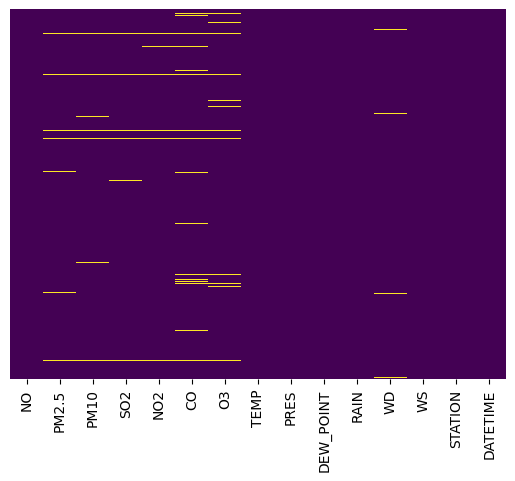

In [584]:
import seaborn as sns
sns.heatmap(df_merged.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

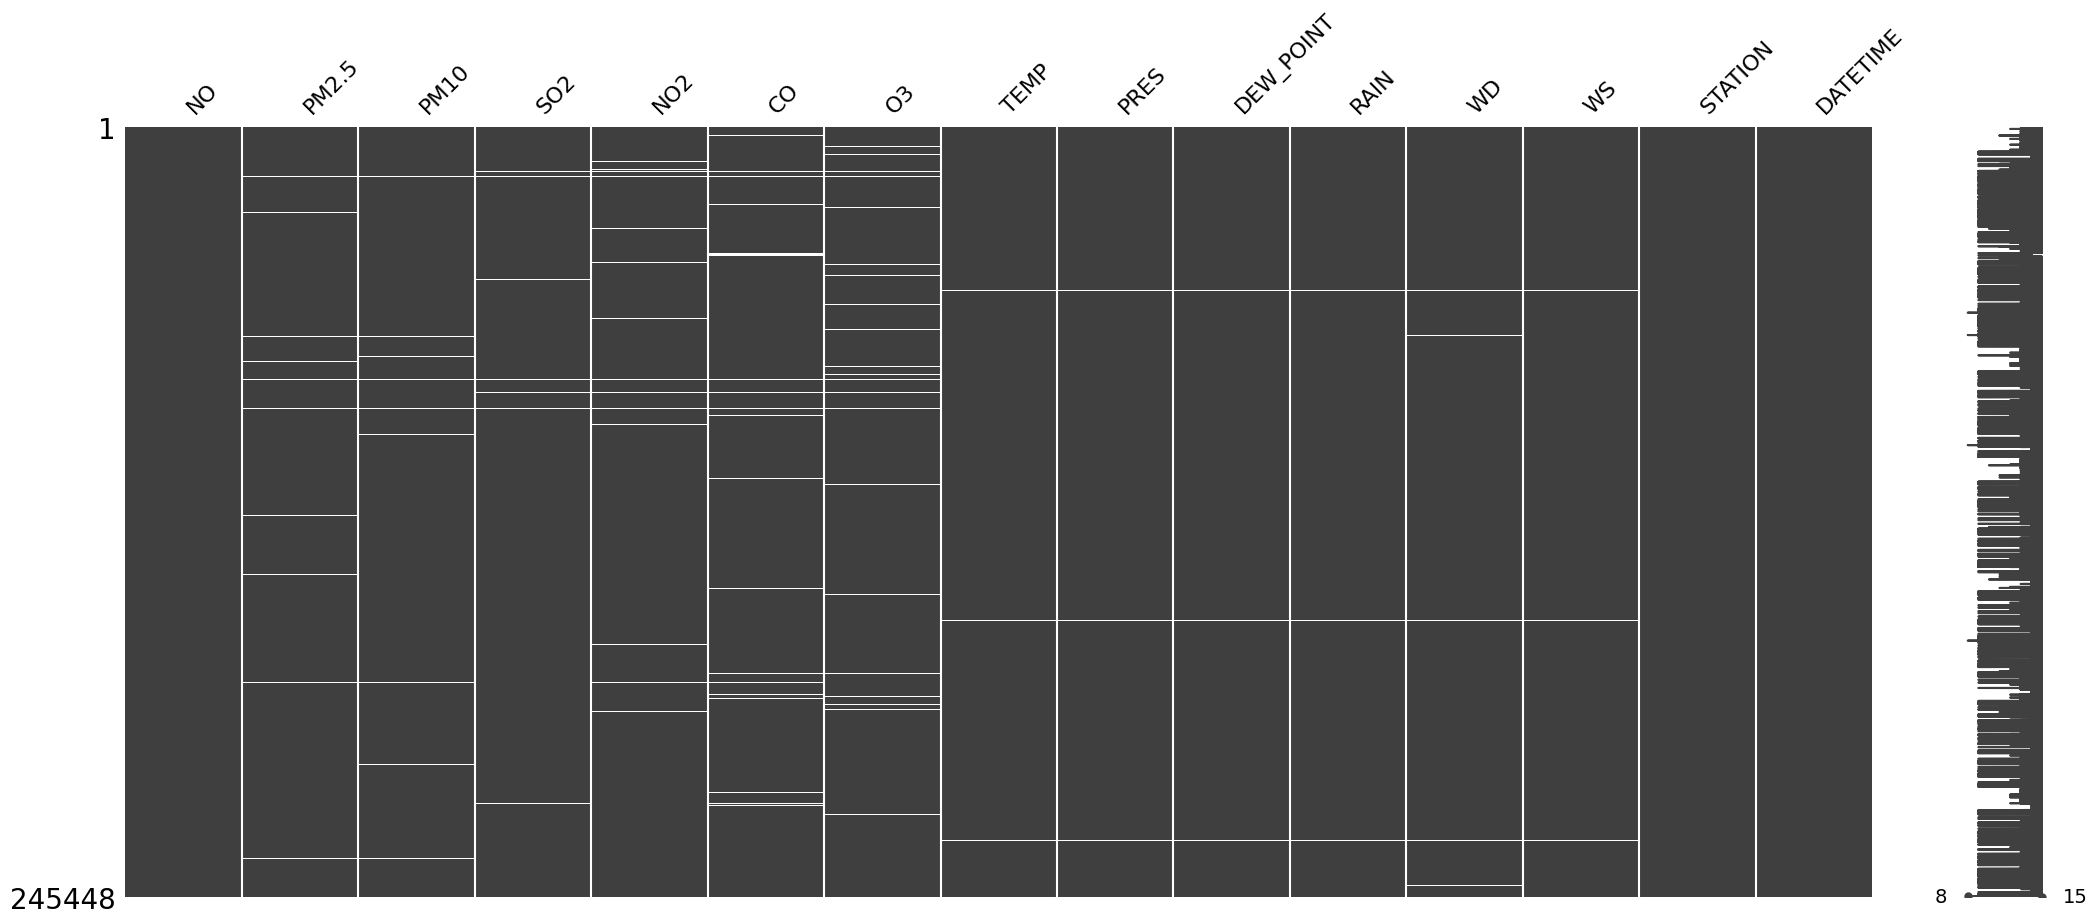

In [585]:
# This also view the Missing values in Our Dataset
import missingno as msno
msno.matrix(df_merged)


# **Drop the No Column becuase it is not Important.**

In [586]:
df_merged.drop('NO', axis=1, inplace=True)

In [587]:
# Check the NO column is droped from the Head
df_merged.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEW_POINT,RAIN,WD,WS,STATION,DATETIME
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


# **Total missing values per variable**

In [589]:
data = df_merged.copy()
data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data.set_index('DATETIME', inplace=True)

# **Check Missing Year wise Carbon Monoxide Value using plot**

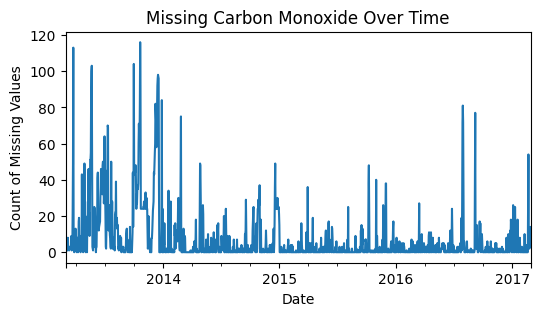

In [590]:
mis_co = data['CO'].isnull().astype(int)
plt.figure(figsize=(6, 3))
mis_co.resample('D').sum().plot(title="Missing Carbon Monoxide Over Time", ylabel="Count of Missing Values", xlabel="Date")
plt.show()

# **Check Total Missing Values Per Variable using Bar Plot.**

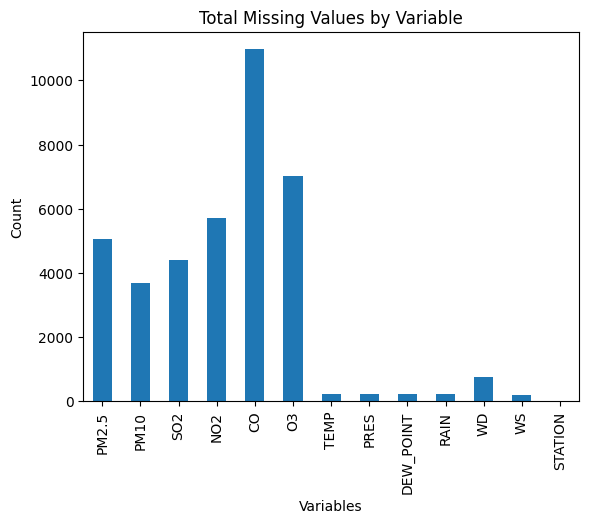

In [591]:
data.isnull().sum().plot(kind='bar', title='Total Missing Values by Variable', xlabel='Variables', ylabel='Count')
plt.show()

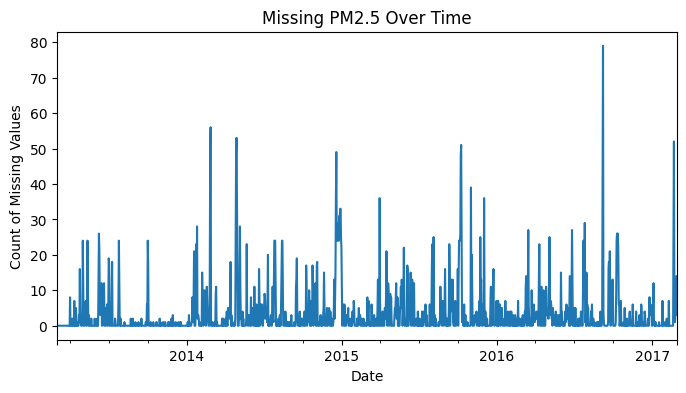

In [592]:
mis_pm25 = data['PM2.5'].isnull().astype(int)
plt.figure(figsize=(8, 4))
mis_pm25.resample('D').sum().plot(title="Missing PM2.5 Over Time", ylabel="Count of Missing Values", xlabel="Date")
plt.show()


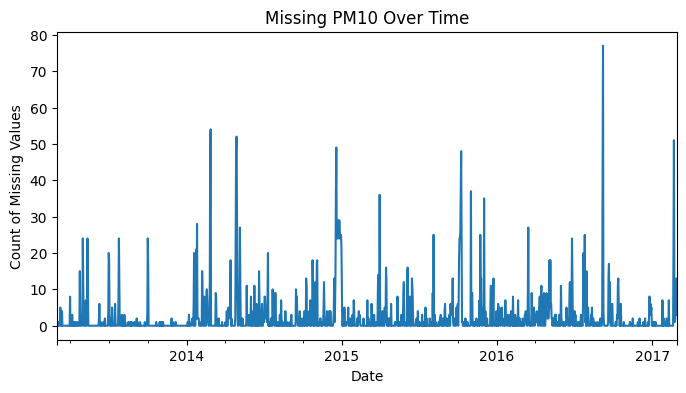

In [593]:
mis_pm10 = data['PM10'].isnull().astype(int)
plt.figure(figsize=(8, 4))
mis_pm10.resample('D').sum().plot(title="Missing PM10 Over Time", ylabel="Count of Missing Values", xlabel="Date")
plt.show()


# **Filling null values using**

# **I use Interpolation becuase my data set is Time-Series data.**

In [594]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
data[pollutants] = data[pollutants].interpolate(method='time')
print(data[pollutants].isnull().sum())

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
dtype: int64


In [595]:
columns_to_interpolate = ['TEMP', 'PRES', 'DEW_POINT']
data[columns_to_interpolate] = data[columns_to_interpolate].interpolate(method='linear')
print(data[columns_to_interpolate].isnull().sum())

TEMP         0
PRES         0
DEW_POINT    0
dtype: int64


# **For fill the Rain and Wind Speed I used Fo**

In [596]:
data['RAIN'] = data['RAIN'].ffill()
data['RAIN'] = data['RAIN'].bfill()
data['WS'] = data['WS'].ffill()
data['WS'] = data['WS'].bfill()

# **Verify the null values are fill.**

In [597]:
print(data.isnull().sum())

PM2.5          0
PM10           0
SO2            0
NO2            0
CO             0
O3             0
TEMP           0
PRES           0
DEW_POINT      0
RAIN           0
WD           758
WS             0
STATION        0
dtype: int64


# **Check the Null Values Summary in Data Set**

In [599]:
data.isna().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEW_POINT,0
RAIN,0


# **Convert Wind Direction into Quater-Winds**

In [600]:
direction_mapping = {
    'N': 0,         # North
    'NNE': 22.5,    # North-North-East
    'NE': 45,       # North-East
    'ENE': 67.5,    # East-North-East
    'E': 90,        # East
    'SE': 135,      # South-East
    'S': 180,       # South
    'SSW': 202.5,   # South-South-West
    'SW': 225,      # South-West
    'WSW': 247.5,   # West-South-West
    'W': 270,       # West
    'WNW': 292.5,   # West-North-West
    'NW': 315,      # North-West
    'NNW': 337.5    # North-North-West
}

# Apply the mapping to the 'Wind Direction' column
data['WD'] = data['WD'].map(direction_mapping)

# **Wind Direction Column fill with Previous Valid Value**

In [601]:
data['WD'] = data['WD'].ffill()

In [602]:
data.isna().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEW_POINT,0
RAIN,0


# **Now check the Dataset still have Null values.**

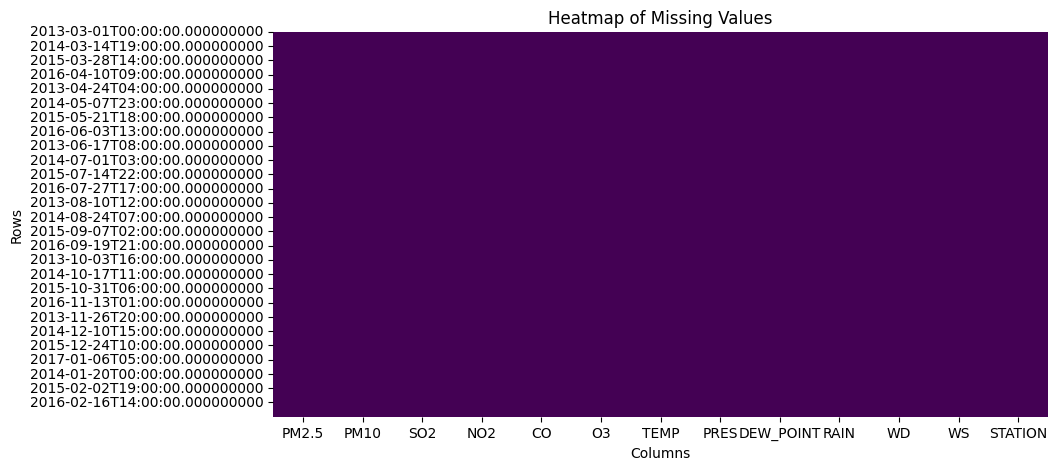

In [603]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [604]:
data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEW_POINT,RAIN,WD,WS,STATION
DATETIME,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,337.5,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,0.0,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,337.5,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,315.0,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0.0,2.0,Aotizhongxin


In [605]:
data.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEW_POINT,RAIN,WD,WS
count,245448.000000,245448.000000,245448.000000,245448.000000,245448.00000,245448.000000,245448.000000,245448.000000,245448.000000,245448.000000,245448.000000,245448.000000
mean,79.616245,105.659951,16.203809,51.255435,1234.88739,58.375080,13.687417,1010.307053,2.423638,0.064000,161.730988,1.724930
std,81.152558,93.212421,22.179268,35.771180,1173.85550,56.695551,11.382705,10.496129,13.778336,0.823121,111.810170,1.250778
min,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.00000,11.000000,3.300000,1001.800000,-9.000000,0.000000,67.500000,0.900000
50%,55.000000,83.000000,7.140000,44.000000,900.00000,46.000000,14.600000,1009.900000,2.900000,0.000000,180.000000,1.400000
75%,110.000000,147.000000,20.000000,72.000000,1500.00000,83.000000,23.400000,1018.600000,15.000000,0.000000,270.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.00000,500.000000,41.600000,1042.000000,28.800000,72.500000,337.500000,13.200000


In [606]:
data.dtypes

,0
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64
O3,float64
TEMP,float64
PRES,float64
DEW_POINT,float64
RAIN,float64


# **Feature Engineering**

In [607]:
import numpy as np

def calculate_humidity(temp, dew_point):
    # Calculate relative humidity using the dew point and temperature
    numerator = np.exp((17.27 * temp) / (temp + 237.7))
    denominator = np.exp((17.27 * dew_point) / (dew_point + 237.7))
    return 100 * (denominator / numerator)

# Apply to your data
data['HUMIDITY'] = data.apply(lambda row: calculate_humidity(row['TEMP'], row['DEW_POINT']), axis=1)

# View the calculated humidity
print(data[['TEMP', 'DEW_POINT', 'HUMIDITY']].head())


                     TEMP  DEW_POINT   HUMIDITY
DATETIME                                       
2013-03-01 00:00:00  -0.7      -18.8  23.878120
2013-03-01 01:00:00  -1.1      -18.2  25.880955
2013-03-01 02:00:00  -1.1      -18.2  25.880955
2013-03-01 03:00:00  -1.4      -19.4  23.872562
2013-03-01 04:00:00  -2.0      -19.5  24.737858


# **Calculate AQI and AQI Category.**

In [608]:
# Define AQI breakpoints
breakpoints = {
    'PM2.5': {
        'low': [0, 12, 35.4, 55.4, 150, 250],
        'high': [12, 35.4, 55.4, 150, 250, 500],
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500]
    },
    'PM10': {
        'low': [0, 54, 154, 254, 354, 424],
        'high': [54, 154, 254, 354, 424, 604],
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500]
    },
    'NO2': {
        'low': [0, 53, 100, 360, 649, 1249],
        'high': [53, 100, 360, 649, 1249, 2049],
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500]
    },
    'CO': {
        'low': [0, 4.4, 9.4, 12.4, 15.4, 30.4],
        'high': [4.4, 9.4, 12.4, 15.4, 30.4, 50.4],
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500]
    },
    'SO2': {
        'low': [0, 35, 75, 185, 304, 604],
        'high': [35, 75, 185, 304, 604, 1004],
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500]
    },
    'O3': {
        'low': [0, 54, 70, 85, 105, 200],
        'high': [54, 70, 85, 105, 200, 300],
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500]
    }
}

# AQI Categories
aqi_categories = {
    (0, 50): "Good",
    (51, 100): "Moderate",
    (101, 150): "Unhealthy for Sensitive Groups",
    (151, 200): "Unhealthy",
    (201, 300): "Very Unhealthy",
    (301, 500): "Hazardous"
}

# Function to calculate AQI and category
def calculate_aqi(concentration, pollutant):
    if pd.isnull(concentration):
        return None, None  # Return None if the concentration is NaN

    low_bp = breakpoints[pollutant]['low']
    high_bp = breakpoints[pollutant]['high']
    low_aqi = breakpoints[pollutant]['low_aqi']
    high_aqi = breakpoints[pollutant]['high_aqi']

    # Find the breakpoint range
    for i in range(len(low_bp)):
        if low_bp[i] <= concentration <= high_bp[i]:
            I_low = low_aqi[i]
            I_high = high_aqi[i]
            BP_low = low_bp[i]
            BP_high = high_bp[i]
            # Calculate AQI using interpolation
            aqi = ((I_high - I_low) / (BP_high - BP_low)) * (concentration - BP_low) + I_low
            # Determine the AQI category
            for (low, high), category in aqi_categories.items():
                if low <= aqi <= high:
                    return round(aqi, 2), category
    return None, None  # If no range matches

# Function to calculate max AQI and category across pollutants
def calculate_max_aqi_and_category(row):
    pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
    aqi_values = []
    categories = []

    # Calculate AQI and category for each pollutant
    for pollutant in pollutants:
        aqi, category = calculate_aqi(row[pollutant], pollutant)
        if aqi is not None:
            aqi_values.append(aqi)
            categories.append(category)

    # Determine maximum AQI and its category
    if aqi_values:
        max_aqi = max(aqi_values)
        max_category = categories[aqi_values.index(max_aqi)]
        return max_aqi, max_category
    else:
        return None, None

# Apply AQI calculations to the dataset
data['MAX_AQI'], data['AQI_CATEGORY'] = zip(*data.apply(calculate_max_aqi_and_category, axis=1))

# Display the results
print(data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'MAX_AQI', 'AQI_CATEGORY']].head())

                     PM2.5  PM10   NO2     CO   SO2    O3  MAX_AQI  \
DATETIME                                                             
2013-03-01 00:00:00    4.0   4.0   7.0  300.0   4.0  77.0   123.33   
2013-03-01 01:00:00    8.0   8.0   7.0  300.0   4.0  77.0   123.33   
2013-03-01 02:00:00    7.0   7.0  10.0  300.0   5.0  73.0   110.00   
2013-03-01 03:00:00    6.0   6.0  11.0  300.0  11.0  72.0   106.67   
2013-03-01 04:00:00    3.0   3.0  12.0  300.0  12.0  72.0   106.67   

                                       AQI_CATEGORY  
DATETIME                                             
2013-03-01 00:00:00  Unhealthy for Sensitive Groups  
2013-03-01 01:00:00  Unhealthy for Sensitive Groups  
2013-03-01 02:00:00  Unhealthy for Sensitive Groups  
2013-03-01 03:00:00  Unhealthy for Sensitive Groups  
2013-03-01 04:00:00  Unhealthy for Sensitive Groups  


In [609]:
data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEW_POINT,RAIN,WD,WS,STATION,HUMIDITY,MAX_AQI,AQI_CATEGORY
DATETIME,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,337.5,4.4,Aotizhongxin,23.878120,123.33,Unhealthy for Sensitive Groups
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,0.0,4.7,Aotizhongxin,25.880955,123.33,Unhealthy for Sensitive Groups
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,337.5,5.6,Aotizhongxin,25.880955,110.00,Unhealthy for Sensitive Groups
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,315.0,3.1,Aotizhongxin,23.872562,106.67,Unhealthy for Sensitive Groups
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0.0,2.0,Aotizhongxin,24.737858,106.67,Unhealthy for Sensitive Groups


In [610]:
data.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEW_POINT,RAIN,WD,WS,HUMIDITY,MAX_AQI
count,245448.000000,245448.000000,245448.000000,245448.000000,245448.00000,245448.000000,245448.000000,245448.000000,245448.000000,245448.000000,245448.000000,245448.000000,245448.000000,245448.000000
mean,79.616245,105.659951,16.203809,51.255435,1234.88739,58.375080,13.687417,1010.307053,2.423638,0.064000,161.730988,1.724930,52.462096,169.053483
std,81.152558,93.212421,22.179268,35.771180,1173.85550,56.695551,11.382705,10.496129,13.778336,0.823121,111.810170,1.250778,25.158034,85.505359
min,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000,0.000000,2.961829,12.500000
25%,20.000000,36.000000,3.000000,23.000000,500.00000,11.000000,3.300000,1001.800000,-9.000000,0.000000,67.500000,0.900000,30.028649,101.500000
50%,55.000000,83.000000,7.140000,44.000000,900.00000,46.000000,14.600000,1009.900000,2.900000,0.000000,180.000000,1.400000,51.125824,163.845000
75%,110.000000,147.000000,20.000000,72.000000,1500.00000,83.000000,23.400000,1018.600000,15.000000,0.000000,270.000000,2.200000,73.894952,212.630000
max,999.000000,999.000000,500.000000,290.000000,10000.00000,500.000000,41.600000,1042.000000,28.800000,72.500000,337.500000,13.200000,100.000000,500.000000


# **Handle Outliers in My Dataset.**

# **plot boxplot to check outliers in my dataset selected columns**

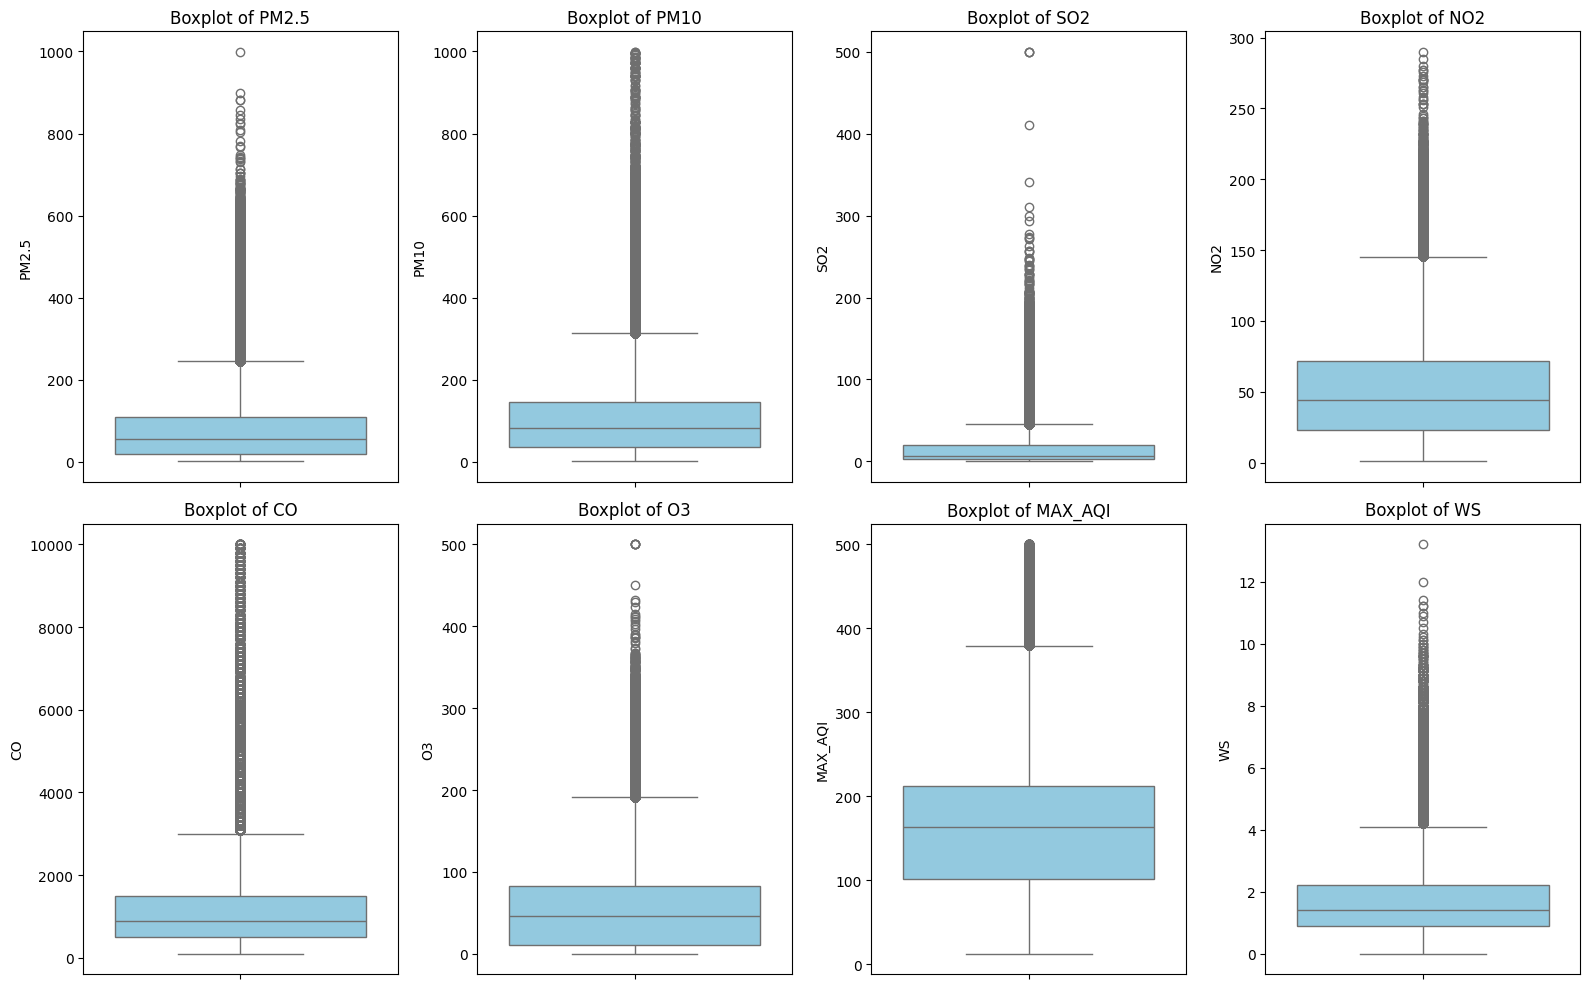

In [611]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','MAX_AQI','WS']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# **check the each column number of outliers using IRQ function.**

In [612]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: Found {len(outliers)} outliers")
    return outliers

# Check outliers for each column
for col in numerical_columns:
    detect_outliers_iqr(data, col)


PM2.5: Found 11850 outliers
PM10: Found 8485 outliers
SO2: Found 22216 outliers
NO2: Found 4292 outliers
CO: Found 17704 outliers
O3: Found 9744 outliers
MAX_AQI: Found 5848 outliers
WS: Found 13707 outliers


# **use cap method to replace my outliers with the nearest valid values**

In [613]:
# Capping outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap outliers for all numerical columns
for col in numerical_columns:
    data = cap_outliers(data, col)


# **Check again using boxplot still we have the outliers in my dataset.**

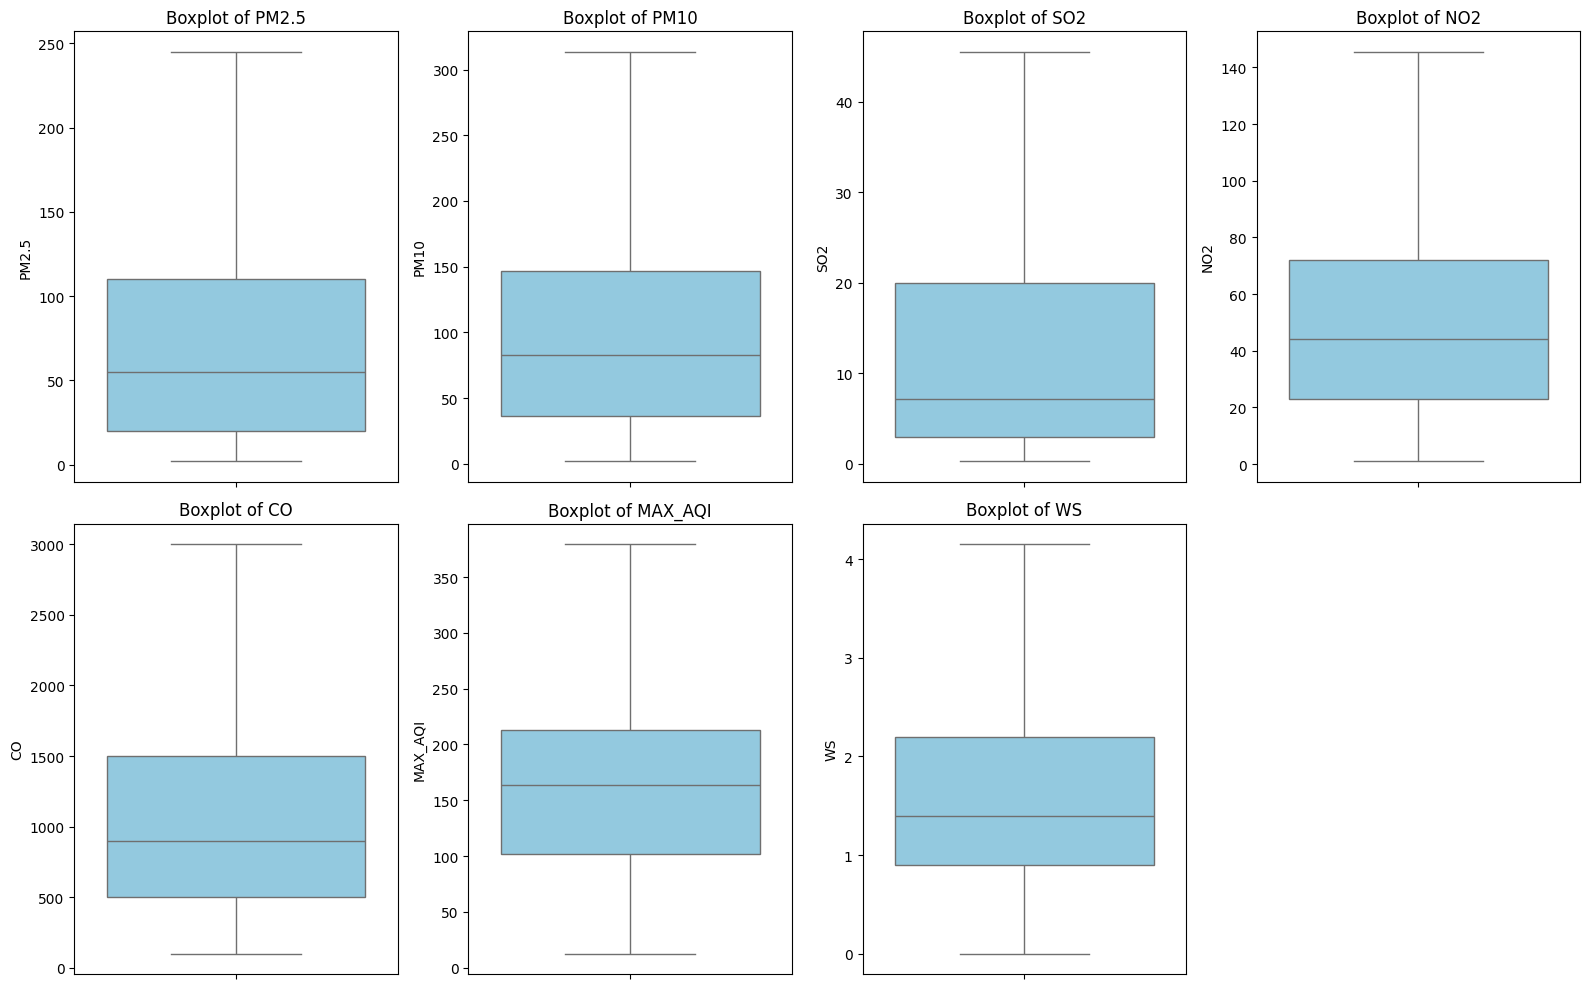

In [614]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO','MAX_AQI','WS']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [615]:
data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEW_POINT,RAIN,WD,WS,STATION,HUMIDITY,MAX_AQI,AQI_CATEGORY
DATETIME,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,337.5,4.15,Aotizhongxin,23.878120,123.33,Unhealthy for Sensitive Groups
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,0.0,4.15,Aotizhongxin,25.880955,123.33,Unhealthy for Sensitive Groups
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,337.5,4.15,Aotizhongxin,25.880955,110.00,Unhealthy for Sensitive Groups
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,315.0,3.10,Aotizhongxin,23.872562,106.67,Unhealthy for Sensitive Groups
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0.0,2.00,Aotizhongxin,24.737858,106.67,Unhealthy for Sensitive Groups


In [616]:
data.to_csv("/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Preprocessed-Data.csv", index=True)
print("File saved successfully!")


File saved successfully!


In [617]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Preprocessed-Data.csv", index_col=0, parse_dates=True)
print(data.head())


                     PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
DATETIME                                                                  
2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   

                     DEW_POINT  RAIN     WD    WS       STATION   HUMIDITY  \
DATETIME                                                                     
2013-03-01 00:00:00      -18.8   0.0  337.5  4.15  Aotizhongxin  23.878120   
2013-03-01 01:00:00      -18.2   0.0    0.0  4.15  Aotizhongxin  25.880955   
2013-03-01 02:00:00      -18.2   0.0  337.5  4.15  Aotizhongxin  25.880955   
2013-03-01 03:00:00      -19.4   0.0  315.0  3.10  Aotizhongxin  23.872562   
2013-0

In [563]:
data.to_csv("/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Preprocessed-Beijing-Multi-Site-Air-Quality.CSV", index=True)

# **EDA**

In [560]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Preprocessed-Beijing-Multi-Site-Air-Quality.CSV")

In [ ]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEW_POINT  RAIN     WD  \
0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0      -18.8   0.0  337.5   
1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2      -18.2   0.0    0.0   
2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5      -18.2   0.0  337.5   
3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5      -19.4   0.0  315.0   
4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2      -19.5   0.0    0.0   

     WS       STATION   HUMIDITY  MAX_AQI                    AQI_CATEGORY  
0  4.15  Aotizhongxin  23.878120   123.33  Unhealthy for Sensitive Groups  
1  4.15  Aotizhongxin  25.880955   123.33  Unhealthy for Sensitive Groups  
2  4.15  Aotizhongxin  25.880955   110.00  Unhealthy for Sensitive Groups  
3  3.10  Aotizhongxin  23.872562   106.67  Unhealthy for Sensitive Groups  
4  2.00  Aotizhongxin  24.737858   106.67  Unhealthy for Sensitive Groups  


In [ ]:
print("Statistical Summary:")
print(data.describe().T)


Statistical Summary:
              count         mean         std         min          25%  \
PM2.5      245448.0    75.661630   67.925561    2.000000    20.000000   
PM10       245448.0   102.288733   80.917066    2.000000    36.000000   
SO2        245448.0    13.709298   14.168658    0.285600     3.000000   
NO2        245448.0    50.863467   34.491366    1.026500    23.000000   
CO         245448.0  1127.779790  827.660127  100.000000   500.000000   
O3         245448.0    56.820654   51.929157    0.214200    11.000000   
TEMP       245448.0    13.687417   11.382705  -16.800000     3.300000   
PRES       245448.0  1010.307053   10.496129  982.400000  1001.800000   
DEW_POINT  245448.0     2.423638   13.778336  -35.300000    -9.000000   
RAIN       245448.0     0.064000    0.823121    0.000000     0.000000   
WD         245448.0   161.730988  111.810170    0.000000    67.500000   
WS         245448.0     1.664380    1.072084    0.000000     0.900000   
HUMIDITY   245448.0    52.4620

In [ ]:
categorical_cols = data.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n", data[col].value_counts(), "\n")


Value counts for STATION:
 STATION
Aotizhongxin     35064
Dingling         35064
Wanshouxigong    35064
Nongzhanguan     35064
Gucheng          35064
Guanyuan         35064
Changping        35064
Name: count, dtype: int64 

Value counts for AQI_CATEGORY:
 AQI_CATEGORY
Unhealthy                         76226
Very Unhealthy                    53408
Moderate                          48021
Unhealthy for Sensitive Groups    36085
Hazardous                         18812
Good                              12896
Name: count, dtype: int64 



# **Distribution Analysis for Numeric Features**

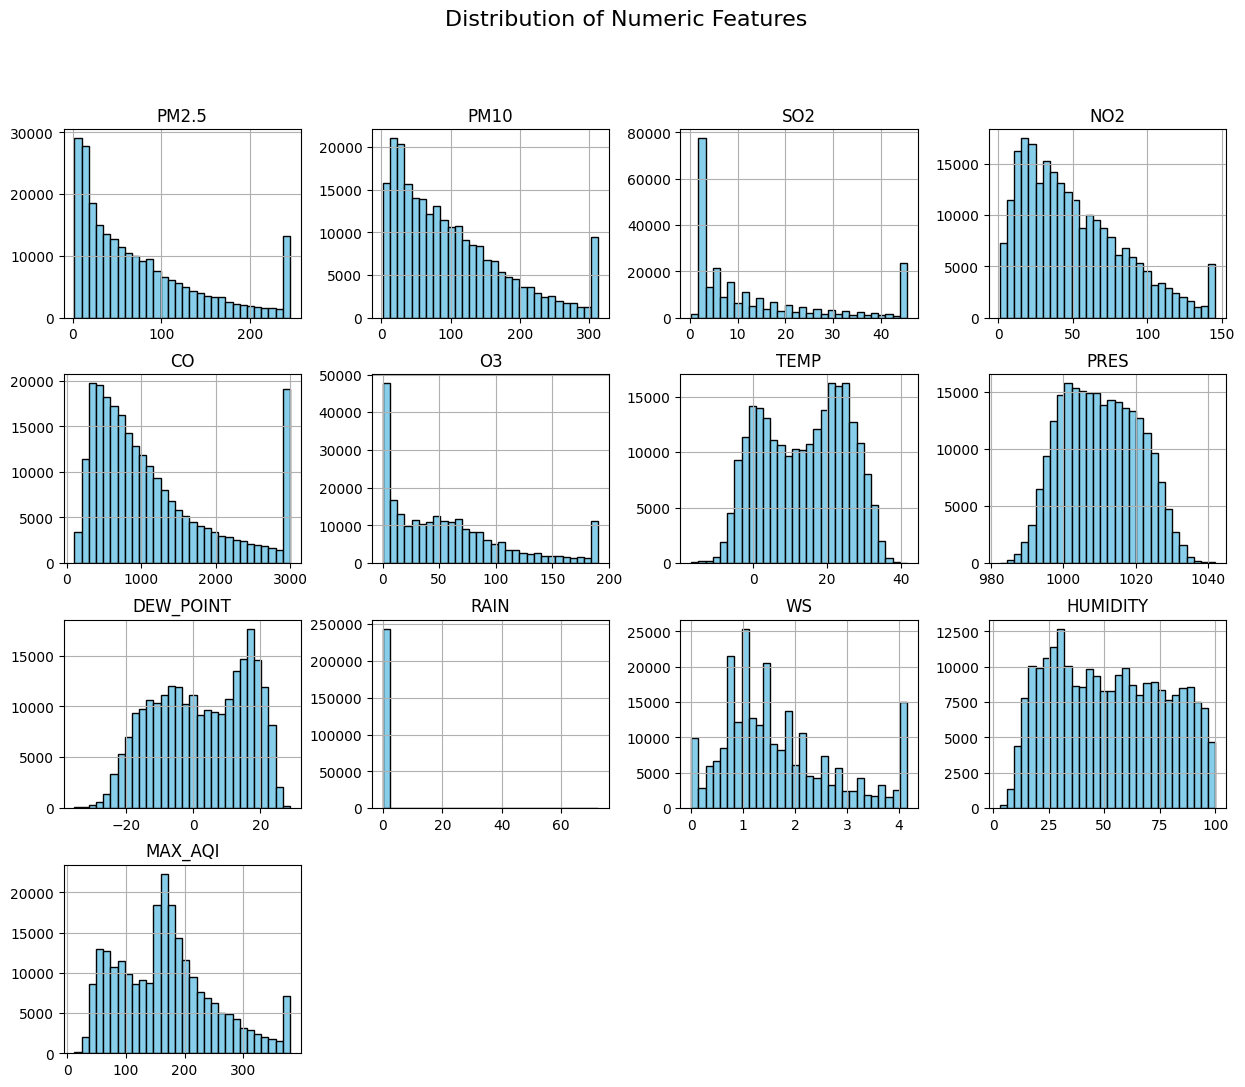

In [ ]:
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEW_POINT', 'RAIN', 'WS', 'HUMIDITY', 'MAX_AQI']
data[numeric_columns].hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

# **Categorical Feature Analysis**

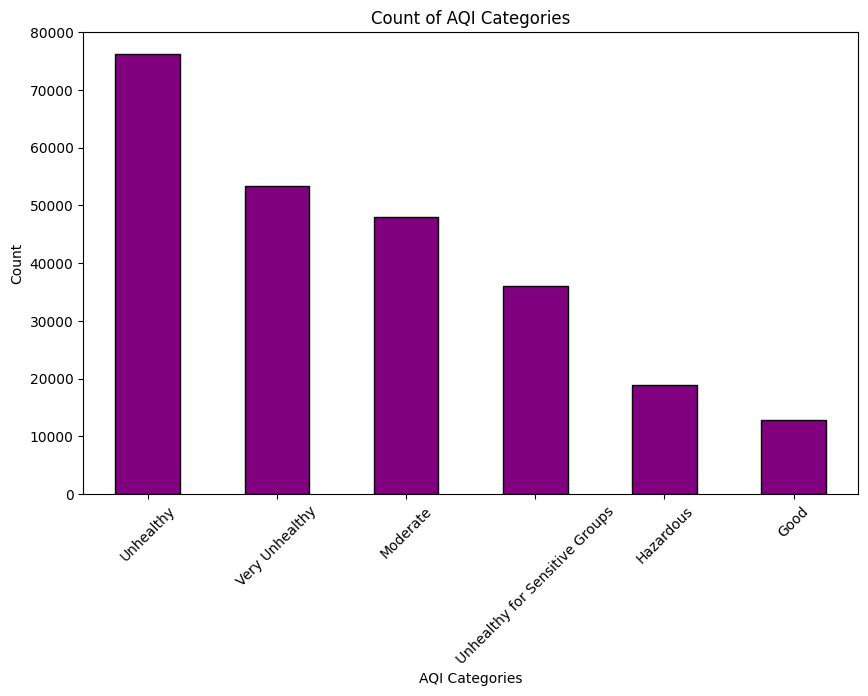

In [ ]:
plt.figure(figsize=(10, 6))
data['AQI_CATEGORY'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Count of AQI Categories')
plt.xlabel('AQI Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Correlation Analysis**

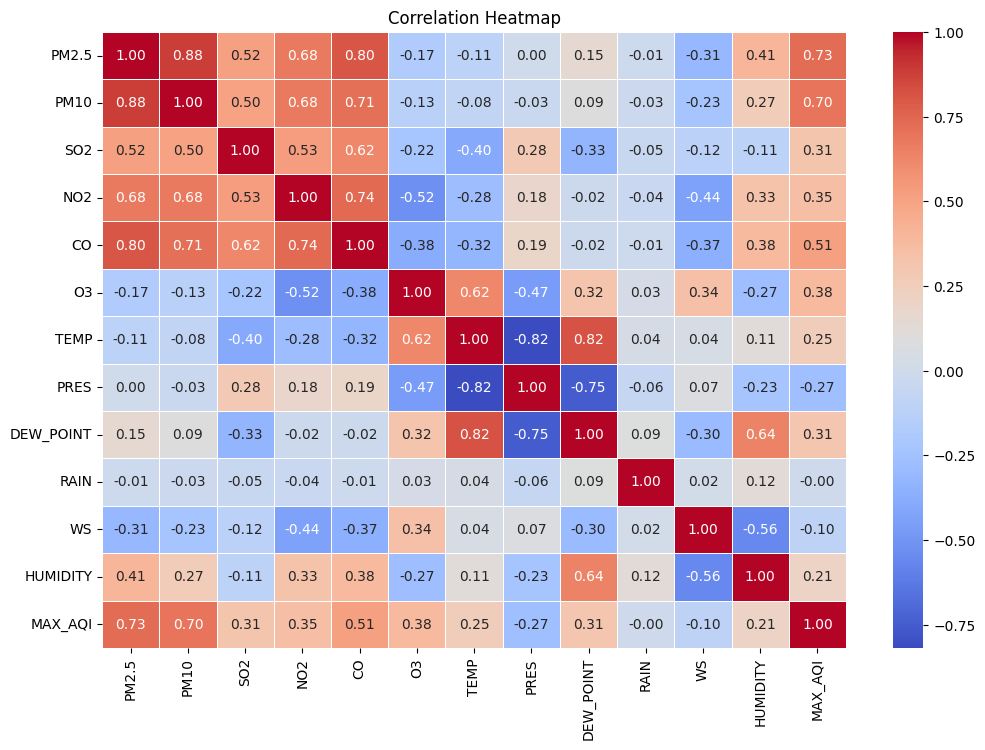

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Station-Specific Analysis**

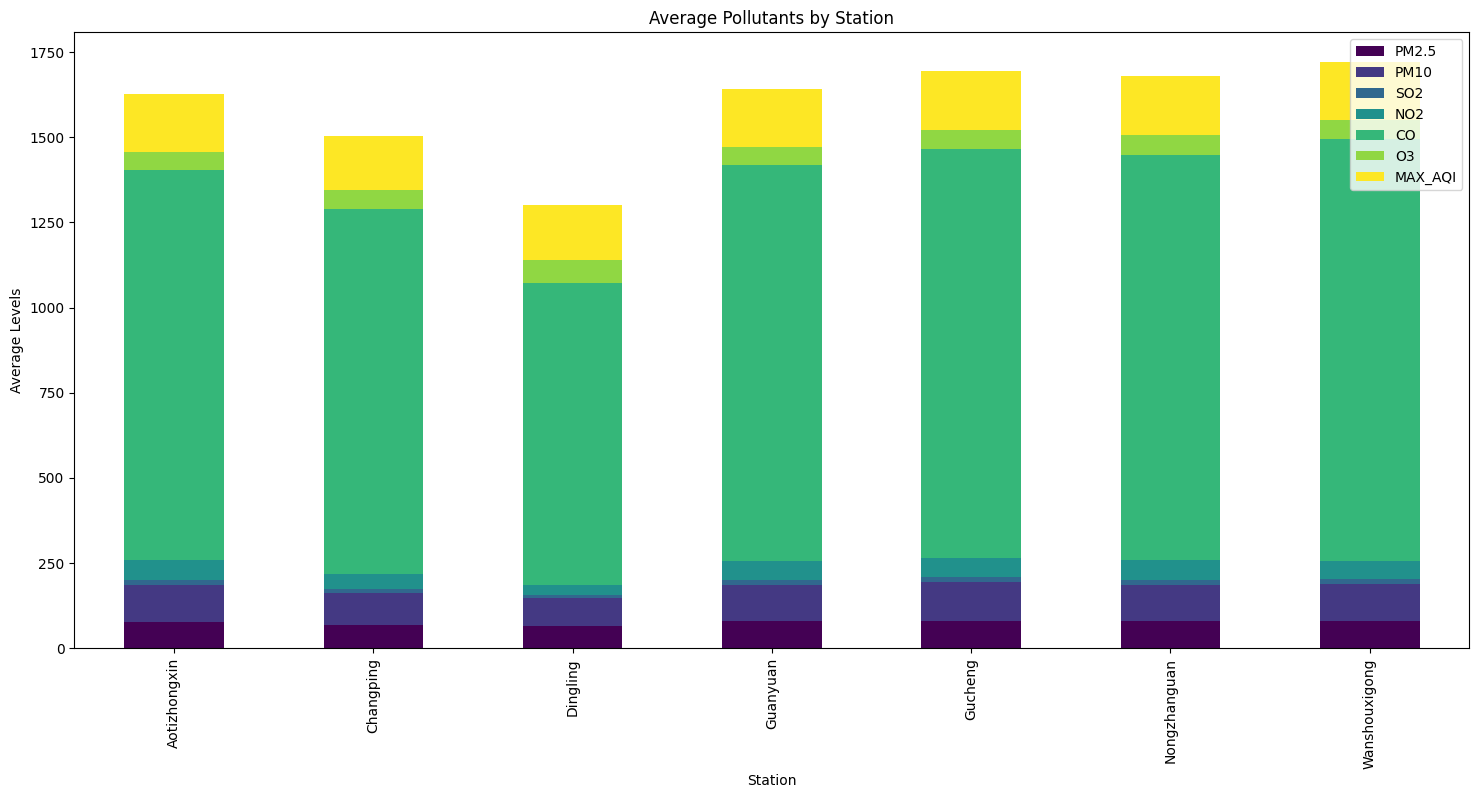

In [ ]:
station_group = data.groupby('STATION')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'MAX_AQI']].mean()
station_group.plot(kind='bar', figsize=(18, 8), stacked=True, colormap='viridis')
plt.title('Average Pollutants by Station')
plt.ylabel('Average Levels')
plt.xlabel('Station')
plt.legend(loc='upper right')
plt.show()

# **Wind Direction Analysis**

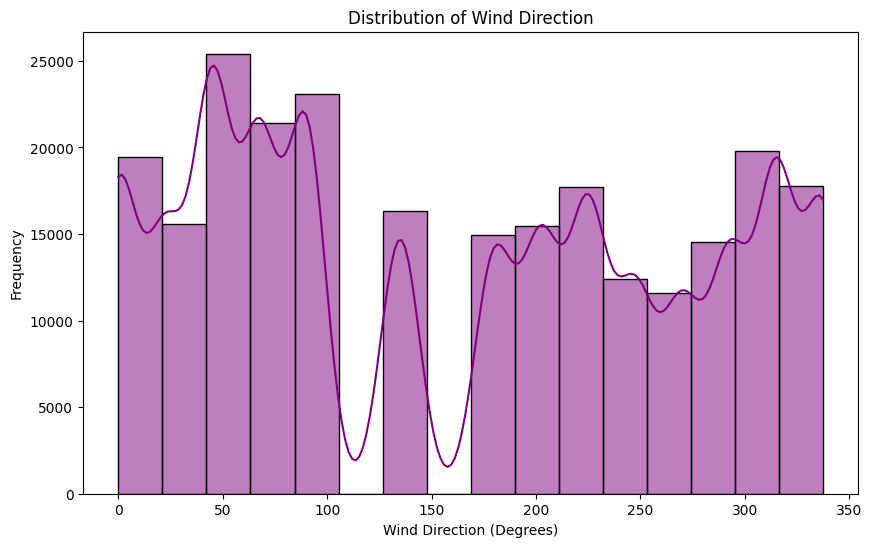

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['WD'], bins=16, kde=True, color='purple')
plt.title('Distribution of Wind Direction')
plt.xlabel('Wind Direction (Degrees)')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


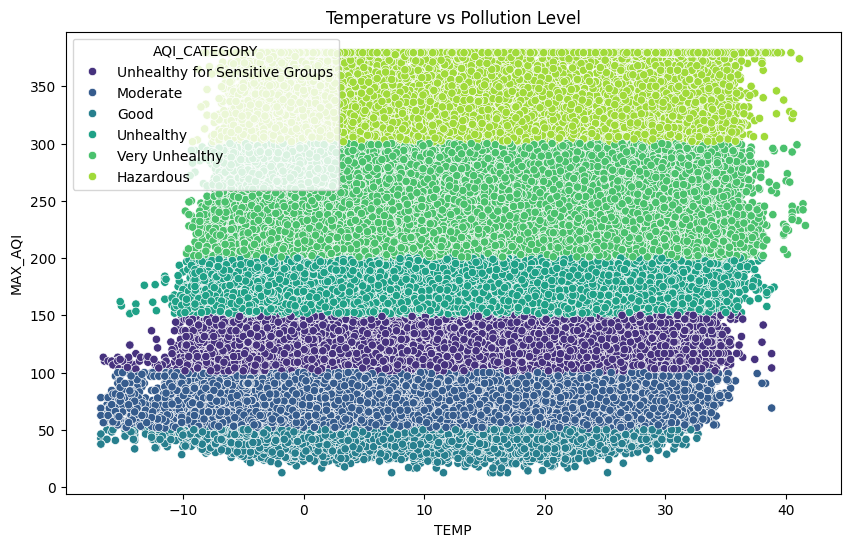

In [ ]:
# Example: Relationship between temperature and pollution level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="TEMP", y="MAX_AQI", hue="AQI_CATEGORY", palette="viridis")
plt.title("Temperature vs Pollution Level")
plt.show()


<ipython-input-541-ef3e1f57753b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="AQI_CATEGORY", y="MAX_AQI", palette="Set3")


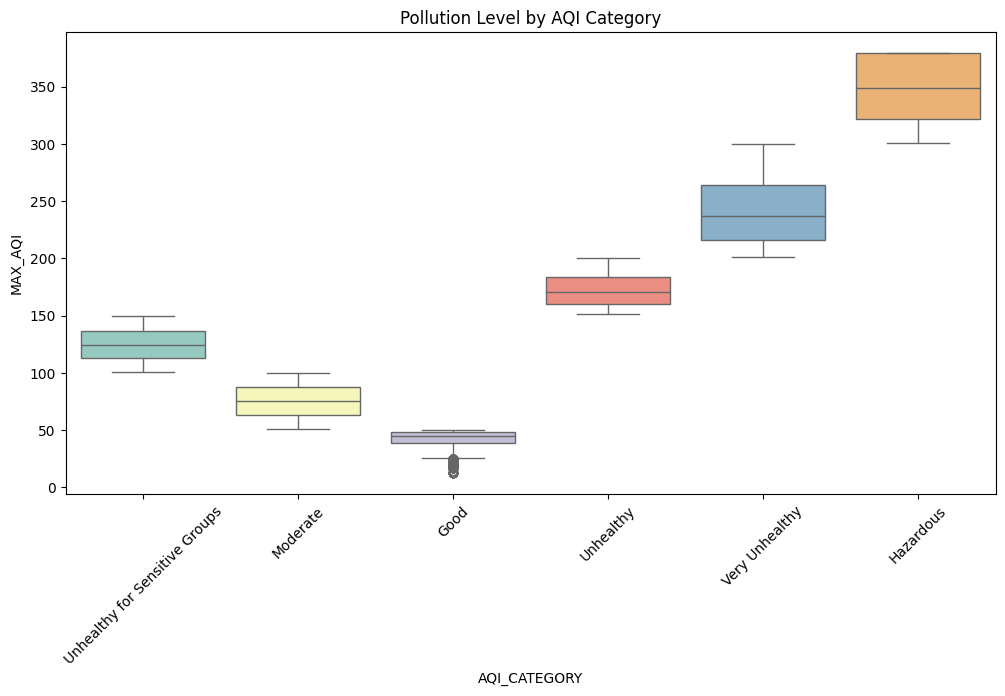

In [ ]:
# Example: Pollution level across AQI categories
if 'AQI_CATEGORY' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x="AQI_CATEGORY", y="MAX_AQI", palette="Set3")
    plt.title("Pollution Level by AQI Category")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Ensure datetime index is set properly
data.index = pd.to_datetime(data.index, errors='coerce')

# Prepare Data
# Extract Year and Month directly from the datetime index
data['Year'] = data.index.year
data['Month'] = data.index.month_name()

In [ ]:
# 1. Sunburst Chart for AQI Categories by Year and Month
if 'AQI_CATEGORY' in data.columns:
    fig = px.sunburst(
        data,
        path=['Year', 'Month', 'AQI_CATEGORY'],  # Hierarchical path
        values='MAX_AQI',  # Weight by MAX_AQI
        color='MAX_AQI',   # Color by MAX_AQI
        color_continuous_scale='RdYlGn',
        title="Sunburst Chart of AQI Categories by Year and Month"
    )
    fig.show()